In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
TRAINING_DIR = "C:/Users/yeani/Downloads/superman/images"

In [3]:
training_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=0,
    width_shift_range=0,
    height_shift_range=0,
    shear_range=0,
    zoom_range=0,
    horizontal_flip=False,
    fill_mode='nearest', 
    validation_split=0.2
    )

In [4]:
training_generator = training_datagen.flow_from_directory(TRAINING_DIR, 
                                                          batch_size=128, 
                                                          target_size=(35,290), 
                                                          class_mode='categorical', 
                                                          subset='training',
                                                         )

Found 4704 images belonging to 6 classes.


In [5]:
validation_generator = training_datagen.flow_from_directory(TRAINING_DIR, 
                                                          batch_size=128, 
                                                          target_size=(35,290), 
                                                          class_mode='categorical',
                                                          subset='validation', 
                                                         )

Found 1170 images belonging to 6 classes.


오리지널 사진 파일
Found 5874 images belonging to 6 classes.
(128, 35, 290, 3) (128, 6)
[0. 0. 0. 0. 0. 1.]


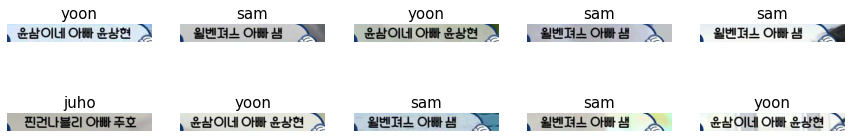

Augmentation 적용한 사진 파일
(128, 35, 290, 3) (128, 6)
[0. 0. 0. 1. 0. 0.]


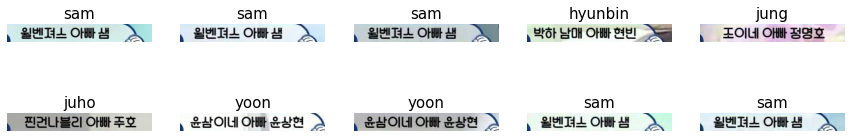

In [6]:
class_map = {
    0: 'hyunbin',
    1: 'juho',    
    2: 'jung',
    3: 'sam',
    4: 'sauri',
    5: 'yoon'
}

print('오리지널 사진 파일')

original_datagen = ImageDataGenerator(rescale=1./255)
original_generator = original_datagen.flow_from_directory(TRAINING_DIR, 
                                                          batch_size=128, 
                                                          target_size=(35,290), 
                                                          class_mode='categorical'
                                                         )

for x, y in original_generator:
    print(x.shape, y.shape)
    print(y[0])
    
    fig, axes = plt.subplots(2, 5)
    fig.set_size_inches(15, 3)
    for i in range(10):
        axes[i//5, i%5].imshow(x[i])
        axes[i//5, i%5].set_title(class_map[y[i].argmax()], fontsize=15)
        axes[i//5, i%5].axis('off')
    plt.show()
    break
    
print('Augmentation 적용한 사진 파일')
    
for x, y in training_generator:
    print(x.shape, y.shape)
    print(y[0])
    
    fig, axes = plt.subplots(2, 5)
    fig.set_size_inches(15, 3)
    for i in range(10):
        axes[i//5, i%5].imshow(x[i])
        axes[i//5, i%5].set_title(class_map[y[i].argmax()], fontsize=15)
        axes[i//5, i%5].axis('off')
    
    plt.show()
    break

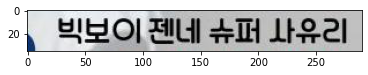

In [7]:
for x, y in original_generator:
    pic = x[:]
    break
    
plt.imshow(pic[0])

In [8]:
conv2d = Conv2D(64, (3, 3), input_shape=(35,290, 3))
conv2d_activation = Conv2D(64, (3, 3), activation='relu', input_shape=(35,290, 3))

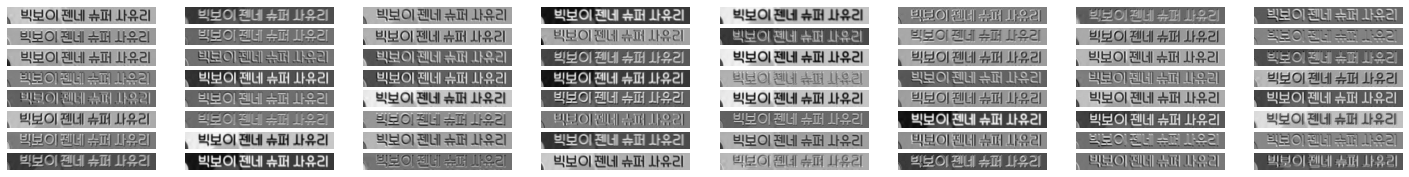

In [9]:
fig, axes = plt.subplots(8, 8)
fig.set_size_inches(25, 3)
for i in range(64):
    axes[i//8, i%8].imshow(conv2d(pic)[0,:,:,i], cmap='gray')
    axes[i//8, i%8].axis('off')

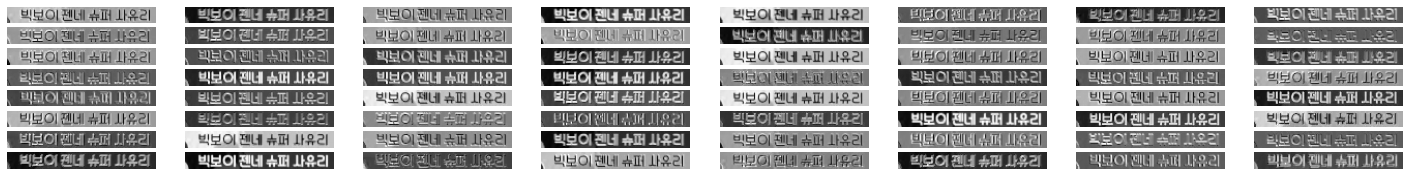

In [10]:
fig, axes = plt.subplots(8, 8)
fig.set_size_inches(25, 3)
for i in range(64):
    axes[i//8, i%8].imshow(MaxPooling2D(2, 2)(conv2d(pic))[0, :, :, i], cmap='gray')
    axes[i//8, i%8].axis('off')

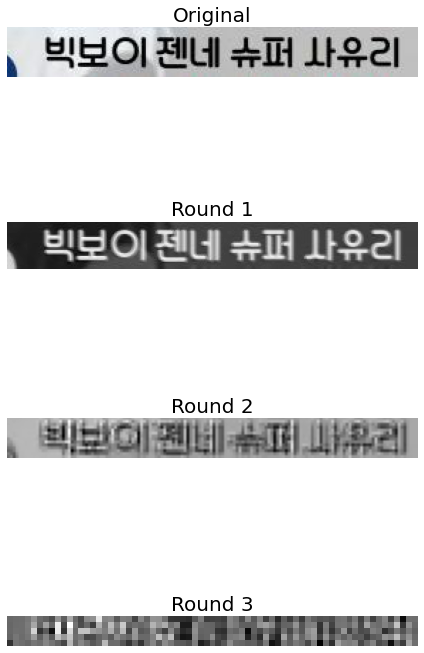

In [11]:
conv1 = Conv2D(64, (3, 3), input_shape=(35,290, 3))(pic)
max1 = MaxPooling2D(2, 2)(conv1)
conv2 = Conv2D(64, (3, 3))(max1)
max2 = MaxPooling2D(2, 2)(conv2)
conv3 = Conv2D(64, (3, 3))(max2)
max3 = MaxPooling2D(2, 2)(conv3)

fig, axes = plt.subplots(4, 1)
fig.set_size_inches(6, 12)
axes[0].set_title('Original', fontsize=20)
axes[0].imshow(pic[0])
axes[0].axis('off')
axes[1].set_title('Round 1', fontsize=20)
axes[1].imshow( conv1[0, :, :, 0], cmap='gray')
axes[1].axis('off')
axes[2].set_title('Round 2', fontsize=20)
axes[2].imshow( conv2[0, :, :, 0], cmap='gray')
axes[2].axis('off')
axes[3].set_title('Round 3', fontsize=20)
axes[3].imshow( conv3[0, :, :, 0], cmap='gray')
axes[3].axis('off')
plt.tight_layout()
plt.show()

In [12]:
model = Sequential([
    # Conv2D, MaxPooling2D 조합으로 층을 쌓습니다. 첫번째 입력층의 input_shape은 (이미지세로사이즈, 이미지가로사이즈, 3)으로 지정합니다.
    Conv2D(64, (3, 3), activation='relu', input_shape=(35,290, 3)),
    MaxPooling2D(2, 2), 
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2), 
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),  
    # 2D -> 1D로 변환을 위하여 Flatten 합니다.
    Flatten(), 
    # 과적합 방지를 위하여 Dropout을 적용합니다.
    Dropout(0.5),
    Dense(512, activation='relu'),
    # Classification을 위한 Softmax 
    # 출력층의 갯수는 클래스의 갯수와 동일하게 맞춰줍니다 (6개), activation은 softmax
    Dense(6, activation='softmax'),
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 33, 288, 64)       1792      
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 16, 144, 64)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 142, 64)       36928     
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 7, 71, 64)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 5, 69, 128)        73856     
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 2, 34, 128)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8704)              0

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [15]:
checkpoint_path = "tmp_checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [16]:
epochs=25

In [17]:
history = model.fit(training_generator, 
                    validation_data=(validation_generator),
                    epochs=epochs,
                    callbacks=[checkpoint],
                    )

Epoch 1/25
37/37 [==============================] - 7s 142ms/step - loss: 0.7708 - acc: 0.7297 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 00001: val_loss improved from inf to 0.00106, saving model to tmp_checkpoint.ckpt
Epoch 2/25
37/37 [==============================] - 3s 85ms/step - loss: 0.0105 - acc: 0.9968 - val_loss: 6.1856e-07 - val_acc: 1.0000

Epoch 00002: val_loss improved from 0.00106 to 0.00000, saving model to tmp_checkpoint.ckpt
Epoch 3/25
37/37 [==============================] - 3s 85ms/step - loss: 1.6623e-06 - acc: 1.0000 - val_loss: 1.5273e-07 - val_acc: 1.0000

Epoch 00003: val_loss improved from 0.00000 to 0.00000, saving model to tmp_checkpoint.ckpt
Epoch 4/25
37/37 [==============================] - 3s 85ms/step - loss: 4.7921e-07 - acc: 1.0000 - val_loss: 1.2705e-07 - val_acc: 1.0000

Epoch 00004: val_loss improved from 0.00000 to 0.00000, saving model to tmp_checkpoint.ckpt
Epoch 5/25
37/37 [==============================] - 3s 85ms/step - loss: 5.3295e-07 - a

In [18]:
model.load_weights(checkpoint_path)

In [19]:
model.save('superman_cnn_model.h5')

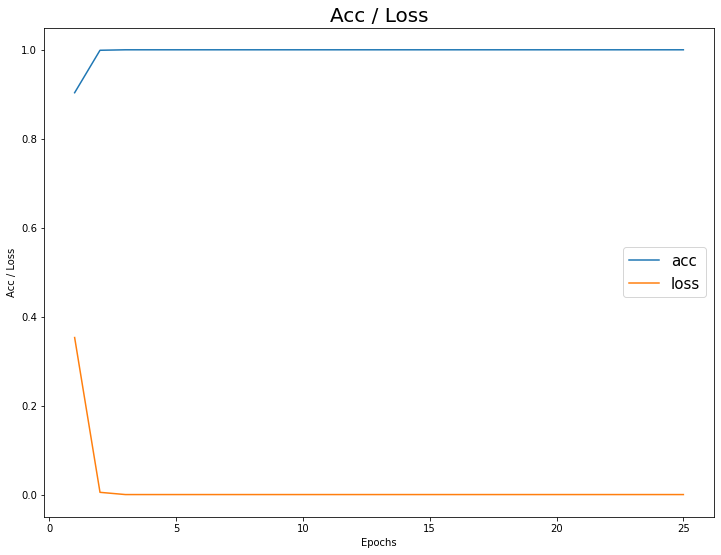

In [20]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, epochs+1), history.history['acc'])
plt.plot(np.arange(1, epochs+1), history.history['loss'])
plt.title('Acc / Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Acc / Loss')
plt.legend(['acc', 'loss'], fontsize=15)
plt.show()